<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/%E4%B8%80%E9%8D%B5%E7%94%A2%E7%94%9F%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3%E8%B2%B7%E8%B3%A3%E8%A8%8A%E8%99%9F(SMA%E7%AD%96%E7%95%A5(%E5%8F%A6%E4%B8%80%E7%A8%AE%E7%B9%AA%E5%9C%96%E9%A2%A8%E6%A0%BC)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 產生訊號

All caught up..!


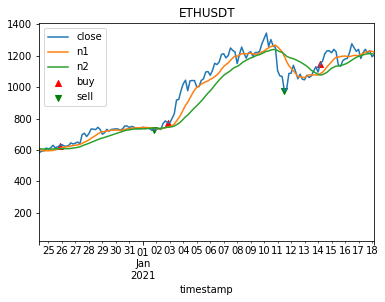

All caught up..!


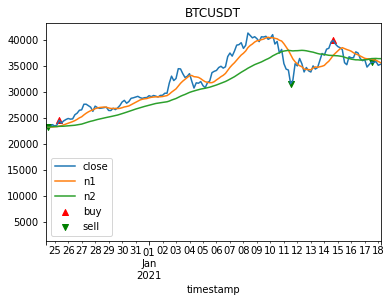

All caught up..!


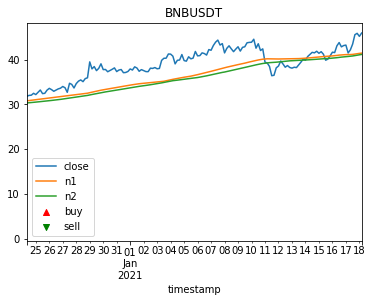

In [8]:
!pip install finlab_crypto > log.txt
import finlab_crypto
import matplotlib.pyplot as plt
import pandas as pd

# config
config = {}
config['ETH'] = {'n1':10,'n2':20}
config['BTC'] = {'n1':10,'n2':35}
config['BNB'] = {'n1':80,'n2':95}
lookback = 150

for cname in config.keys():
  pair = '{}USDT'.format(cname)
  ohlcv = finlab_crypto.crawler.get_all_binance(pair,'4h')
  
  # plot close n1 n2
  table = pd.DataFrame()
  table['close'] = ohlcv.close
  table['n1'] = ohlcv.close.rolling(config[cname]['n1']).mean()
  table['n2'] = ohlcv.close.rolling(config[cname]['n2']).mean()
  table.tail(lookback).plot(title=pair)
  
  # plot buy sell
  table['buy'] = ((table['n1']>table['n2'])&(table['n1'].shift()<table['n2'].shift())).astype(int)
  table['sell'] = ((table['n1']<table['n2'])&(table['n1'].shift()>table['n2'].shift())).astype(int)
  buy_point = table.loc[table['buy']==1,['close']].tail(lookback)
  sell_point = table.loc[table['sell']==1,['close']].tail(lookback)
  plt.scatter(buy_point.index,buy_point.close,label='buy',color='red',marker='^')
  plt.scatter(sell_point.index,sell_point.close,label='sell',color='green',marker='v')
  plt.legend()
  plt.show()